In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic


df = pd.read_csv("./data/vwcars.csv") 

df["logprice"] = np.log(df["price"])
df["lp100"] = 282.48 / df["mpg"]
df["age"] = 2021 - df["year"]

In [70]:
# metric descriptives:
print(df.describe().round(2))

        price     year  mileage     mpg  engineSize     tax  logprice   lp100  \
count  438.00   438.00   438.00  438.00      438.00  438.00    438.00  438.00   
mean    14.68  2017.21    25.11   58.72        1.47   96.80      2.54    5.11   
std      7.75     1.96    25.04   17.75        0.42   61.65      0.55    1.19   
min      3.50  2006.00     1.20   32.50        1.00    0.00      1.25    1.70   
25%      7.78  2016.00     6.05   50.40        1.00   20.00      2.05    4.40   
50%     12.00  2017.00    17.53   60.10        1.50  145.00      2.48    4.70   
75%     20.99  2019.00    33.37   64.20        2.00  145.00      3.04    5.60   
max     38.99  2020.00   138.57  166.00        2.00  265.00      3.66    8.69   

          age  model_T-Roc  model_Up  fuelType_Petrol  fuelType_Hybrid  \
count  438.00       438.00    438.00           438.00           438.00   
mean     3.79         0.29      0.34             0.58             0.03   
std      1.96         0.45      0.48            

In [4]:
df.groupby("fuelType").count()

,price,model,year,mileage,mpg,engineSize,tax,transmission,logprice,lp100,age
fuelType,,,,,,,,,,,
Diesel,169,169,169,169,169,169,169,169,169,169,169
Hybrid,13,13,13,13,13,13,13,13,13,13,13
Petrol,256,256,256,256,256,256,256,256,256,256,256


In [5]:
df.groupby("model").count()

,price,year,mileage,mpg,fuelType,engineSize,tax,transmission,logprice,lp100,age
model,,,,,,,,,,,
Passat,161,161,161,161,161,161,161,161,161,161,161
T-Roc,127,127,127,127,127,127,127,127,127,127,127
Up,150,150,150,150,150,150,150,150,150,150,150


In [6]:
df.groupby("transmission").count()

,price,model,year,mileage,mpg,fuelType,engineSize,tax,logprice,lp100,age
transmission,,,,,,,,,,,
Automatic,52,52,52,52,52,52,52,52,52,52,52
Manual,320,320,320,320,320,320,320,320,320,320,320
Semi-Auto,66,66,66,66,66,66,66,66,66,66,66


In [44]:
# compute dummy variables:
# Passat, Manual and Diesel as base categories
df["model_TRoc"] = df["model"].apply(lambda x: 1 if x == "T-Roc" else 0)
df["model_Up"] = df["model"].apply(lambda x: 1 if x == "Up" else 0)

df["fuelType_Petrol"] = df["fuelType"].apply(lambda x: 1 if x == "Petrol" else 0)
df["fuelType_Hybrid"] = df["fuelType"].apply(lambda x: 1 if x == "Hybrid" else 0)

df["transmission_Automatic"] = df["transmission"].apply(lambda x: 1 if x == "Automatic" else 0)
df["transmission_SemiAuto"] = df["transmission"].apply(lambda x: 1 if x == "Semi-Auto" else 0)

df

,price,model,year,mileage,mpg,fuelType,engineSize,tax,transmission,logprice,lp100,age,model_T-Roc,model_Up,fuelType_Petrol,fuelType_Hybrid,transmission_Automatic,transmission_Semi-Auto,model_TRoc,transmission_SemiAuto
0,22.972,Passat,2018,56.955,166.0,Hybrid,1.4,135,Semi-Auto,3.134276,1.701687,3,0,0,0,1,0,1,0,1
1,8.590,Passat,2015,62.459,70.6,Diesel,1.6,20,Manual,2.150599,4.001133,6,0,0,0,0,0,0,0,0
2,19.750,Passat,2019,4.116,45.6,Petrol,1.5,145,Manual,2.983153,6.194737,2,0,0,1,0,0,0,0,0
3,28.000,Passat,2019,5.530,43.5,Hybrid,1.4,135,Semi-Auto,3.332205,6.493793,2,0,0,0,1,0,1,0,1
4,10.890,Passat,2016,62.162,68.9,Diesel,2.0,20,Manual,2.387845,4.099855,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,6.800,Up,2017,20.000,64.2,Petrol,1.0,145,Manual,1.916923,4.400000,4,0,1,1,0,0,0,0,0
434,7.800,Up,2017,16.700,60.1,Petrol,1.0,145,Manual,2.054124,4.700166,4,0,1,1,0,0,0,0,0
435,9.900,Up,2019,5.000,54.3,Petrol,1.0,145,Manual,2.292535,5.202210,2,0,1,1,0,0,0,0,0
436,6.562,Up,2017,42.998,64.2,Petrol,1.0,145,Manual,1.881295,4.400000,4,0,1,1,0,0,0,0,0


In [87]:
# mosaic plots:
from statsmodels.graphics.mosaicplot import mosaic
# fig, ax = plt.subplots()
# fig.set_size_inches(5, 5)

df.groupby(["transmission", "fuelType"]).count()


price  model  year  mileage  mpg  engineSize  tax  \
transmission fuelType                                                      
Automatic    Diesel       26     26    26       26   26          26   26   
             Hybrid        4      4     4        4    4           4    4   
             Petrol       22     22    22       22   22          22   22   
Manual       Diesel      108    108   108      108  108         108  108   
             Petrol      212    212   212      212  212         212  212   
Semi-Auto    Diesel       35     35    35       35   35          35   35   
             Hybrid        9      9     9        9    9           9    9   
             Petrol       22     22    22       22   22          22   22   

                       logprice  lp100  age  model_T-Roc  model_Up  \
transmission fuelType                                                
Automatic    Diesel          26     26   26           26        26   
             Hybrid           4      4    4            4         4   
             Petrol          22     22   22           22        22   
Manual       Diesel         108    108  108          108       108   
             Petrol         212    212  212          212       212   
Semi-Auto    Diesel          35     35   35           35        35   
             Hybrid           9      9    9            9         9   
             Petrol          22     22   22           22        22   

                       fuelType_Petrol  fuelType_Hybrid  \
transmission fuelType                                     
Automatic    Diesel                 26               26   
             Hybrid                  4                4   
             Petrol                 22               22   
Manual       Diesel                108              108   
             Petrol                212              212   
Semi-Auto    Diesel                 35               35   
             Hybrid                  9                9   
             Petrol                 22               22   

                       transmission_Automatic  transmission_Semi-Auto  \
transmission fuelType                                                   
Automatic    Diesel                        26                      26   
             Hybrid                         4                       4   
             Petrol                        22                      22   
Manual       Diesel                       108                     108   
             Petrol                       212                     212   
Semi-Auto    Diesel                        35                      35   
             Hybrid                         9                       9   
             Petrol                        22                      22   

                       model_TRoc  transmission_SemiAuto  logprice_pred  \
transmission fuelType                                                     
Automatic    Diesel            26                     26             26   
             Hybrid             4                      4              4   
             Petrol            22                     22             22   
Manual       Diesel           108                    108            108   
             Petrol           212                    212            212   
Semi-Auto    Diesel            35                     35             35   
             Hybrid             9                      9              9   
             Petrol            22                     22             22   

                       residuals  
transmission fuelType             
Automatic    Diesel           26  
             Hybrid            4  
             Petrol           22  
Manual       Diesel          108  
             Petrol          212  
Semi-Auto    Diesel           35  
             Hybrid            9  
             Petrol           22

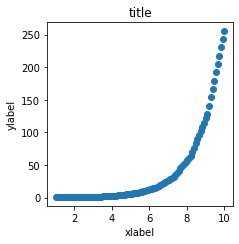

In [94]:
# some functions used later:

def qqplot(arrx, arry,  title = "title", xlabel = "xlabel",ylabel = "ylabel", savepath = "", quantilecount= 100, linelimit=-1):
    quantilesx= []
    quantilesy = []
    for i in range(quantilecount+1):
        q = i/quantilecount
        quantilesx.append(stats.norm.ppf(q) if (type(arrx) is type(None)) else np.quantile(arrx,q))
        quantilesy.append(stats.norm.ppf(q) if (type(arry) is type(None)) else np.quantile(arry,q))
    fig, ax = plt.subplots()
    fig.set_size_inches(3.5, 3.5)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    #plt.axis('scaled')
    plt.tight_layout()
    plt.scatter(x= quantilesx, y=quantilesy)
    if(linelimit >0):
        plt.plot([-linelimit,linelimit],[-linelimit,linelimit])
  
    if(savepath != ""):
        fig.savefig(savepath, format='png', dpi=300)
    plt.show()

# example:
qqplot([1,2,3,10,4,5,6,7,8,9], [0.25,0.5,4,8,16,32,64,128,256,1,2])


def scatter(arrx, arry,  title = "title", xlabel = "xlabel",ylabel = "ylabel", savepath = ""):
    fig, ax = plt.subplots()
    fig.set_size_inches(3.5, 3.5)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.tight_layout()
    plt.scatter(arrx, arry)
    if(savepath != ""):
        fig.savefig(savepath, format='png', dpi=300)
    plt.show()


model for price:

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     355.9
Date:                Mon, 17 Jan 2022   Prob (F-statistic):          1.14e-150
Time:                        17:25:19   Log-Likelihood:                -1160.0
No. Observations:                 438   AIC:                             2332.
Df Residuals:                     432   BIC:                             2357.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1921      1.274 

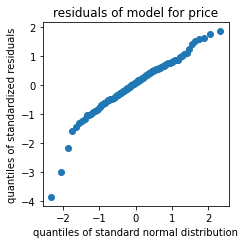

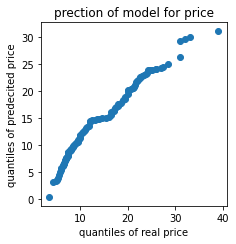

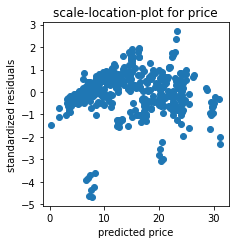


model for logprice:

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     428.8
Date:                Mon, 17 Jan 2022   Prob (F-statistic):          5.77e-165
Time:                        17:25:19   Log-Likelihood:                 32.957
No. Observations:                 438   AIC:                            -53.91
Df Residuals:                     432   BIC:                            -29.42
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7947      0.0

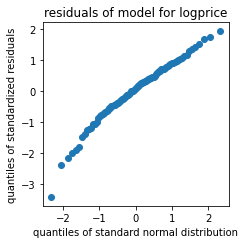

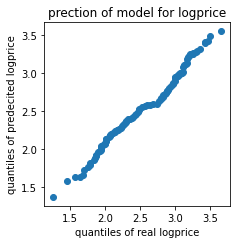

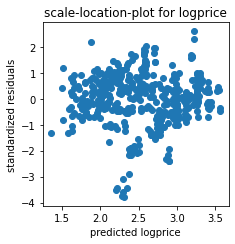

In [95]:
# estimate the two linear models:
ys = ["price","logprice"]

for y in ys:
    modelformula = y + " ~ mileage + engineSize + tax + lp100 + age"
    
    model = ols(modelformula, df).fit()
    dfcopy = df.copy()
    
    dfcopy["yhat"] = model.predict(dfcopy)
    dfcopy["residuals"] = dfcopy["yhat"] - dfcopy[y]
    dfcopy["residuals_z"] = (dfcopy["residuals"] - dfcopy["residuals"].mean())/dfcopy["residuals"].std(ddof=0)
    print("\nmodel for " + y + ":\n")
    # R² and adjusted R²:
    print(model.summary())
    # Q-Q-plot of standardized residuals and a standard normal distribution:
    qqplot(None, dfcopy["residuals_z"], xlabel="quantiles of standard normal distribution", ylabel="quantiles of standardized residuals", title=f"residuals of model for {y}",savepath=f"latex/images/qqplot_resz_{y}.png")
    # Q-Q-plot of y and yhat
    qqplot(dfcopy[y],dfcopy["yhat"], xlabel=f"quantiles of real {y}", ylabel=f"quantiles of predecited {y}", title=f"prection of model for {y}", savepath=f"latex/images/qqplot_yyhat_{y}.png")
    # scale location plot:
    scatter(dfcopy["yhat"], dfcopy["residuals_z"], title=f"scale-location-plot for {y}", xlabel=f"predicted {y}", ylabel=f"standardized residuals", savepath=f"latex/images/scalelocationplot_{y}.png")

In [48]:
# comparison:
# model with logprice has better R² 0.832 vs 0.805 and all graphs look better

In [54]:
# best subset selection:
from sympy.utilities.iterables import multiset_combinations
y = "logprice"
vars = ["mileage","engineSize","tax","lp100", "age", "model", "fuelType", "transmission" ]
allvarcombinations = [None] + [list(multiset_combinations(vars,i))  for i in range(1,9)]
models = []
# models with one predictor:
print("All Models to consider for Subset selection:")
for i in range(1,9):
    print("\n number of predictors: " + str(i) + "\n")
    combs = allvarcombinations[i]
    for c in combs:
        modelformula = y + " ~ " + " + ".join(c)
        # replace categorical variables with dummy variables:
        modelformula = modelformula.replace("model", "model_TRoc + model_Up")
        modelformula = modelformula.replace("fuelType", "fuelType_Petrol + fuelType_Hybrid")
        modelformula = modelformula.replace("transmission", "transmission_Automatic + transmission_SemiAuto")
        models.append({"i": i, "formula": modelformula, "model": None})
        print(modelformula)


All Models to consider for Subset selection:

 number of predictors: 1

logprice ~ age
logprice ~ engineSize
logprice ~ fuelType_Petrol + fuelType_Hybrid
logprice ~ lp100
logprice ~ mileage
logprice ~ model_TRoc + model_Up
logprice ~ tax
logprice ~ transmission_Automatic + transmission_SemiAuto

 number of predictors: 2

logprice ~ age + engineSize
logprice ~ age + fuelType_Petrol + fuelType_Hybrid
logprice ~ age + lp100
logprice ~ age + mileage
logprice ~ age + model_TRoc + model_Up
logprice ~ age + tax
logprice ~ age + transmission_Automatic + transmission_SemiAuto
logprice ~ engineSize + fuelType_Petrol + fuelType_Hybrid
logprice ~ engineSize + lp100
logprice ~ engineSize + mileage
logprice ~ engineSize + model_TRoc + model_Up
logprice ~ engineSize + tax
logprice ~ engineSize + transmission_Automatic + transmission_SemiAuto
logprice ~ fuelType_Petrol + fuelType_Hybrid + lp100
logprice ~ fuelType_Petrol + fuelType_Hybrid + mileage
logprice ~ fuelType_Petrol + fuelType_Hybrid + model_

In [55]:
# calulate models:
for m in models:
    mod = ols(m["formula"], df).fit()
    m["model"] = mod
    m["AIC"] = m["model"].aic
    m["BIC"]= m["model"].bic

In [58]:
# select best model for each number of predictors:
bestmodelsBIC = [None]*9
bestmodelsAIC =  [None]*9
for i in range(1,9):
    imodels = list(filter(lambda m: m["i"] == i,models))
    bicmin = 100000000000
    aicmin = 100000000000
    for m in imodels:
        if(m["AIC"] < aicmin):
            aicmin = m["AIC"]
            bestmodelsAIC[i] = m
        if(m["BIC"] < bicmin):
            bicmin = m["BIC"]
            bestmodelsBIC[i] = m
        
print("Models suggested by AIC")
print([m["AIC"] if m != None else "" for m in bestmodelsAIC])
print("Models suggested by BIC")
print([m["BIC"] if m != None else "" for m in bestmodelsBIC])



Models suggested by AIC
['', 213.46318711596496, -215.14714489323183, -414.1410435554342, -564.2219110117023, -651.7799965963877, -706.2470554646227, -706.4098687099299, -706.3530405884262]
Models suggested by BIC
['', 225.7098438470943, -198.81826925172604, -393.72994900355195, -535.6463786390672, -619.1222453133762, -665.4248663608582, -661.505460695789, -657.3664136639088]


AICS: ['', 213.46318711596496, -215.14714489323183, -414.1410435554342, -564.2219110117023, -651.7799965963877, -706.2470554646227, -706.4098687099299, -706.3530405884262]
BICS: ['', 225.7098438470943, -198.81826925172604, -393.72994900355195, -535.6463786390672, -619.1222453133762, -665.4248663608582, -661.505460695789, -657.3664136639088]


best model is the model with the 
- **7** predictors, according to AIC
- **6** predictors, according to BIC

Lets find out what this model with 6 predictors is:

In [62]:
print(bestmodelsBIC[6])

# BIC = -665.4248663608582 shows this is the correct model.
# results in formula: logprice ~ age + engineSize + fuelType_Petrol + fuelType_Hybrid + mileage + model_TRoc + model_Up + transmission_Automatic + transmission_SemiAuto

# so final 6 predictors are: age, engineSize, fuelType, mileage, model and transmission
# not so important have been: fuel consumption (lp100) and tax.

{'i': 6, 'formula': 'logprice ~ age + engineSize + fuelType_Petrol + fuelType_Hybrid + mileage + model_TRoc + model_Up + transmission_Automatic + transmission_SemiAuto', 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x28D69D60>, 'AIC': -706.2470554646227, 'BIC': -665.4248663608582}


In [66]:
# best model:

modelresults = bestmodelsBIC[6]["model"]


"""
model parameters:
                coef	std err	t	    P>|t|	[0.025	0.975]
Intercept	    2.1756	0.053	41.201	0.000	2.072	2.279
age	            -0.1410	0.008	-17.734	0.000	-0.157	-0.125
engineSize	    0.7152	0.029	24.874	0.000	0.659	0.772
mileage	        -0.0061	0.001	-9.710	0.000	-0.007	-0.005

"""

print(modelresults.summary())


                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1233.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):          9.62e-300
Time:                        14:48:04   Log-Likelihood:                 363.12
No. Observations:                 438   AIC:                            -706.2
Df Residuals:                     428   BIC:                            -665.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

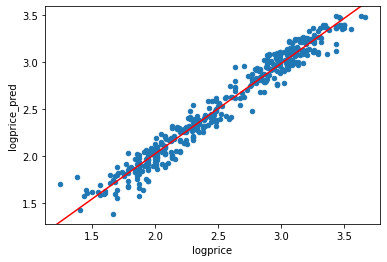

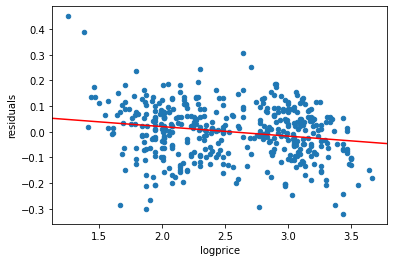

In [67]:
from statsmodels.graphics.regressionplots import abline_plot
# prediction plot
y = df["logprice"]
df["logprice_pred"] = modelresults.predict(df)
df["residuals"] = df["logprice_pred"] - df["logprice"]
# scatter-plot regression
ax = df.plot(x='logprice', y='logprice_pred', kind='scatter')
abline_plot(model_results=ols("logprice_pred ~ logprice", df).fit(), ax=ax, color="red")
plt.show()

# scatter-plot residuals

ax = df.plot(x='logprice', y='residuals', kind='scatter')
abline_plot(model_results=ols("residuals ~ logprice", df).fit(), ax=ax, color="red")
plt.show()

# residuals sum up to 0 but are not uncorrelated with logprice. Therefore no good model fit yet.

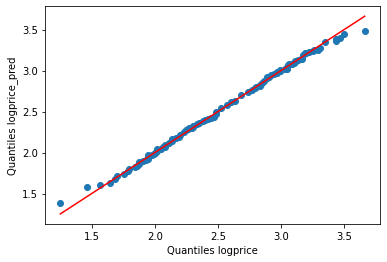

In [68]:
# qq plot with normal distribution:
linelimit = 3
quantilecount = 100
quantilesReal = []
quantilesPredicted = []
for i in range(quantilecount+1):
    q = i/quantilecount
    quantilesReal.append((np.quantile(df["logprice"],q)))
    quantilesPredicted.append((np.quantile(df["logprice_pred"],q)))
fig, ax = plt.subplots()
ax.set_xlabel("Quantiles logprice")
ax.set_ylabel("Quantiles logprice_pred")
plt.scatter(x= quantilesReal, y=quantilesPredicted)
plt.plot(quantilesReal, quantilesReal, color="red")
#plt.plot([-linelimit,linelimit],[-linelimit,linelimit])
plt.show()